# 📊 Prompt Injection Detection Benchmark

Interactive notebook for benchmarking prompt injection detection against standardized public datasets.

**Datasets:**
- 🔴 **SaTML CTF 2024** - Real adversarial attacks from competition
- 🟡 **deepset/prompt-injections** - Diverse injection attempts
- 🟢 **NotInject** - Benign samples with trigger words (over-defense testing)
- 🔵 **LLMail-Inject** - Email-based injection scenarios

In [2]:
import sys
import os
from pathlib import Path

# Add current directory to path so local modules import correctly
sys.path.insert(0, os.path.abspath('.'))

import structlog
import pandas as pd
from tqdm.notebook import tqdm

# Configure Logging
structlog.configure(
    processors=[
        structlog.processors.TimeStamper(fmt="iso"),
        structlog.dev.ConsoleRenderer()
    ]
)

# Custom Imports
from benchmarks import (
    BenchmarkRunner, 
    # specific loaders not strictly needed if BenchmarkRunner handles them, 
    # but good to have if you want to inspect data manually later
    load_satml_dataset, 
    AVAILABLE_DATASETS 
)
from src.detection.embedding_classifier import EmbeddingClassifier

# --- Configuration ---
MODELS_DIR = Path('models')

# Find models
model_files = sorted(list(MODELS_DIR.glob('*_classifier.json')))

print(f"🔍 Found {len(model_files)} models in {MODELS_DIR}:")
for m in model_files:
    print(f"  • {m.name}")

🔍 Found 4 models in models:
  • all-MiniLM-L6-v2_classifier.json
  • comprehensive_classifier.json
  • prompt_injection_classifier.json
  • satml_classifier.json


## ⚙️ Configuration

In [3]:
results_data = []

# Define datasets to test
DATASETS_TO_TEST = ['satml', 'deepset', 'llmail']
LIMIT = 300

print(f"🚀 Starting benchmarks on {len(model_files)} models...")

for model_path in tqdm(model_files, desc="Benchmarking"):
    try:
        # Load model
        det = EmbeddingClassifier()
        det.load_model(str(model_path))
        
        # Initialize Runner
        # We pass threshold=0.5 as default
        run = BenchmarkRunner(det, threshold=0.5)
        
        # Run Benchmark
        # verbose=False helps keep the notebook clean
        res = run.run_all(
            limit_per_dataset=LIMIT,
            include_datasets=DATASETS_TO_TEST,
            verbose=False
        )
        
        # Collect Data
        results_data.append({
            'Model': model_path.stem.replace('_classifier', ''),
            'Accuracy': res.overall_accuracy,
            'FPR': res.overall_fpr,
            'TP': res.overall_tp,
            'FP': res.overall_fp,
            'Total': res.total_samples
        })
        
    except Exception as e:
        structlog.get_logger().error("benchmark_failed", model=model_path.name, error=str(e))

print("✅ Benchmarking complete.")

🚀 Starting benchmarks on 4 models...


Benchmarking:   0%|          | 0/4 [00:00<?, ?it/s]

2025-12-04T18:38:29.181068Z Loading embedding model        model=all-MiniLM-L6-v2
2025-12-04T18:38:29.897317Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T18:38:29.897662Z Pre-trained model loaded       path=PosixPath('models/all-MiniLM-L6-v2_classifier.json')
2025-12-04T18:38:29.899551Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T18:38:29.899745Z BenchmarkRunner initialized    detector_type=embedding_classifier threshold=0.5
2025-12-04T18:38:29.899896Z Loading dataset: satml        
2025-12-04T18:38:29.900072Z Loading SaTML CTF 2024 dataset limit=300
2025-12-04T18:38:35.066781Z SaTML dataset loaded           samples=300
2025-12-04T18:38:35.067566Z Loading dataset: deepset      
2025-12-04T18:38:35.067848Z Loading deepset/prompt-injections dataset include_injections=True include_safe=True limit=300
2025-12-04T18:38:35.633314Z deepset dataset loaded         injections=203

## 🤖 Load Model

In [4]:
# Load the detector
detector = EmbeddingClassifier()
detector.load_model(MODEL_PATH)

print(f"✅ Model loaded: {MODEL_PATH}")
print(f"   Trained: {detector.is_trained}")
print(f"   Threshold: {detector.threshold}")

2025-12-04T18:28:45.930464Z Loading embedding model        model=all-MiniLM-L6-v2
2025-12-04T18:28:46.637656Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T18:28:46.638154Z Pre-trained model loaded       path=PosixPath('models/all-MiniLM-L6-v2_classifier.json')
2025-12-04T18:28:46.652103Z Model loaded                   is_trained=True path=models/comprehensive_classifier.json
✅ Model loaded: models/comprehensive_classifier.json
   Trained: True
   Threshold: 0.85


## 📂 Load Datasets

In [ ]:
# List available datasets
print("Available Datasets:")
print("=" * 50)
for key, info in AVAILABLE_DATASETS.items():
    print(f"  {key}: {info['name']} ({info['type']})")

In [4]:
import sys
import os
from pathlib import Path

# Add current directory to path so local modules import correctly
sys.path.insert(0, os.path.abspath('.'))

import structlog
import pandas as pd
from tqdm.notebook import tqdm

# Configure Logging
structlog.configure(
    processors=[
        structlog.processors.TimeStamper(fmt="iso"),
        structlog.dev.ConsoleRenderer()
    ]
)

# Custom Imports
from benchmarks import (
    BenchmarkRunner, 
    # specific loaders not strictly needed if BenchmarkRunner handles them, 
    # but good to have if you want to inspect data manually later
    load_satml_dataset, 
    AVAILABLE_DATASETS 
)
from src.detection.embedding_classifier import EmbeddingClassifier

# --- Configuration ---
MODELS_DIR = Path('models')

# Find models
model_files = sorted(list(MODELS_DIR.glob('*_classifier.json')))

print(f"🔍 Found {len(model_files)} models in {MODELS_DIR}:")
for m in model_files:
    print(f"  • {m.name}")

🔍 Found 4 models in models:
  • all-MiniLM-L6-v2_classifier.json
  • comprehensive_classifier.json
  • prompt_injection_classifier.json
  • satml_classifier.json


## 🏃 Run Benchmark

In [9]:
results_data = []

# Define datasets to test
DATASETS_TO_TEST = ['satml', 'deepset', 'llmail']
LIMIT = 300

print(f"🚀 Starting benchmarks on {len(model_files)} models...")

for model_path in tqdm(model_files, desc="Benchmarking"):
    try:
        # Load model
        det = EmbeddingClassifier()
        det.load_model(str(model_path))
        
        # Initialize Runner
        run = BenchmarkRunner(det, threshold=0.5)
        
        # Run Benchmark
        res = run.run_all(
            limit_per_dataset=LIMIT,
            include_datasets=DATASETS_TO_TEST,
            verbose=False
        )
        
        # Collect Data
        # FIX: Removed 'TP', 'FP', and 'Total' to prevent AttributeError
        results_data.append({
            'Model': model_path.stem.replace('_classifier', ''),
            'Accuracy': res.overall_accuracy,
            'FPR': res.overall_fpr,
            'Object': res  # Store the full object if we need deep inspection later
        })
        
    except Exception as e:
        structlog.get_logger().error("benchmark_failed", model=model_path.name, error=str(e))

print(f"✅ Benchmarking complete. Collected {len(results_data)} results.")

🚀 Starting benchmarks on 4 models...


Benchmarking:   0%|          | 0/4 [00:00<?, ?it/s]

2025-12-04T19:38:25.008866Z Loading embedding model        model=all-MiniLM-L6-v2
2025-12-04T19:38:25.715972Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T19:38:25.716304Z Pre-trained model loaded       path=PosixPath('models/all-MiniLM-L6-v2_classifier.json')
2025-12-04T19:38:25.718156Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T19:38:25.718335Z BenchmarkRunner initialized    detector_type=embedding_classifier threshold=0.5
2025-12-04T19:38:25.718543Z Loading dataset: satml        
2025-12-04T19:38:25.718754Z Loading SaTML CTF 2024 dataset limit=300
2025-12-04T19:38:30.613679Z SaTML dataset loaded           samples=300
2025-12-04T19:38:30.614267Z Loading dataset: deepset      
2025-12-04T19:38:30.614594Z Loading deepset/prompt-injections dataset include_injections=True include_safe=True limit=300
2025-12-04T19:38:30.908104Z deepset dataset loaded         injections=203

## 📈 Results

In [11]:
# Create DataFrame
df = pd.DataFrame(results_data)

if df.empty:
    print("⚠️ No results collected. Check the logs above for errors.")
else:
    # Drop the raw 'Object' column for the display table
    display_df = df.drop(columns=['Object'])
    
    # Sort by Accuracy
    df_sorted = display_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    # Styling
    display(df_sorted.style.format({
        'Accuracy': '{:.1%}',
        'FPR': '{:.1%}'
    }).background_gradient(subset=['Accuracy'], cmap='Greens')
      .background_gradient(subset=['FPR'], cmap='Reds'))

,Model,Accuracy,FPR
0,comprehensive,97.1%,8.3%
1,satml,79.8%,69.7%
2,all-MiniLM-L6-v2,77.9%,0.0%
3,prompt_injection,34.6%,38.3%


In [15]:
!pip install openai
import os
import numpy as np
from typing import List
from openai import AzureOpenAI
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm

# --- CONFIGURATION ---
# ⚠️ Replace 'YOUR_KEY_HERE' with your actual Azure API Key
AZURE_API_KEY = "7awsW9wUrULKH9CLPkeh1oeaeeGmKvIotw8HSYjVtjMcIgj0NqyLJQQJ99BIACYeBjFXJ3w3AAABACOG5UHM" 

# Derived from your URL: https://goodwiinzapi.cognitiveservices.azure.com/...
AZURE_ENDPOINT = "https://goodwiinzapi.cognitiveservices.azure.com/"
API_VERSION = "2023-05-15"
DEPLOYMENT_NAME = "text-embedding-3-small" 

class AzureEmbeddingClassifier:
    """
    A custom detector using Azure OpenAI's text-embedding-3-small.
    """
    def __init__(self, deployment_name=DEPLOYMENT_NAME, threshold=0.5):
        self.client = AzureOpenAI(
            api_key=AZURE_API_KEY,
            api_version=API_VERSION,
            azure_endpoint=AZURE_ENDPOINT
        )
        self.deployment_name = deployment_name
        self.threshold = threshold
        self.classifier = None 
        self.is_trained = False

    def get_embeddings(self, texts: List[str], batch_size=100) -> np.ndarray:
        """Fetch embeddings from Azure OpenAI in batches."""
        embeddings = []
        # Loop through data in batches to avoid hitting API limits
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            # Sanitize input (newlines can affect performance)
            batch = [t.replace("\n", " ") for t in batch]
            
            response = self.client.embeddings.create(
                input=batch,
                model=self.deployment_name # In Azure, 'model' = deployment name
            )
            # Extract vectors
            batch_embs = [d.embedding for d in response.data]
            embeddings.extend(batch_embs)
        return np.array(embeddings)

    def train(self, texts: List[str], labels: List[int]):
        """Train a lightweight classifier on top of embeddings."""
        print(f"🔹 Generating embeddings for {len(texts)} training samples...")
        try:
            X = self.get_embeddings(texts)
            y = np.array(labels)
            
            print("🔹 Fitting Logistic Regression...")
            self.classifier = LogisticRegression(class_weight='balanced', max_iter=1000)
            self.classifier.fit(X, y)
            self.is_trained = True
            print("✅ Training complete.")
        except Exception as e:
            print(f"❌ Training failed: {e}")

    def predict_proba(self, texts: List[str]) -> np.ndarray:
        """Returns probability of class 1 (Injection)."""
        if not self.classifier:
            raise ValueError("Model not trained yet!")
        
        X = self.get_embeddings(texts)
        return self.classifier.predict_proba(X)[:, 1]

    # Interface for BenchmarkRunner
    def predict_score(self, texts: List[str]) -> np.ndarray:
        return self.predict_proba(texts)

# 1. Load Training Data (Deepset)
print("📚 Loading training data (Deepset)...")
from benchmarks import load_deepset_dataset # Ensure explicit import
train_data = load_deepset_dataset(limit=200) 

# FIX: Check data format dynamically
if len(train_data) > 0:
    first_item = train_data[0]
    # If it's a tuple (text, label)
    if isinstance(first_item, tuple):
        print(f"   Detected data format: Tuple")
        train_texts = [d[0] for d in train_data]
        train_labels = [d[1] for d in train_data]
    # If it's a dictionary {'text': ..., 'label': ...}
    elif isinstance(first_item, dict):
        print(f"   Detected data format: Dict")
        train_texts = [d['text'] for d in train_data]
        train_labels = [d['label'] for d in train_data]
    else:
        raise ValueError(f"Unknown data format: {type(first_item)}")
else:
    raise ValueError("Training data is empty!")

print(f"   Loaded {len(train_texts)} samples.")

# 2. Train the Model
azure_detector = AzureEmbeddingClassifier()
azure_detector.train(train_texts, train_labels)

# 2. Train the Model
azure_detector = AzureEmbeddingClassifier()
azure_detector.train(train_texts, train_labels)

# 3. Benchmark (Test on SaTML and LLMail)
if azure_detector.is_trained:
    print(f"\n🚀 Benchmarking Azure Deployment: {DEPLOYMENT_NAME}...")
    
    # We test on DIFFERENT datasets to see if it generalizes well
    runner = BenchmarkRunner(azure_detector, threshold=0.5)
    results = runner.run_all(
        limit_per_dataset=100, 
        include_datasets=['satml', 'llmail'], 
        verbose=False
    )

    print(f"\n📊 Final Results:")
    print(f"   Accuracy: {results.overall_accuracy:.1%}")
    print(f"   FPR:      {results.overall_fpr:.1%}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


📚 Loading training data (Deepset)...
2025-12-04T19:48:41.745394Z Loading deepset/prompt-injections dataset include_injections=True include_safe=True limit=200
2025-12-04T19:48:42.218273Z deepset dataset loaded         injections=200 safe=200 total=400
   Detected data format: Tuple
   Loaded 400 samples.
🔹 Generating embeddings for 400 training samples...
🔹 Fitting Logistic Regression...
✅ Training complete.
🔹 Generating embeddings for 400 training samples...
🔹 Fitting Logistic Regression...
✅ Training complete.

🚀 Benchmarking Azure Deployment: text-embedding-3-small...
2025-12-04T19:48:46.029540Z BenchmarkRunner initialized    detector_type=sklearn_like threshold=0.5
2025-12-04T19:48:46.029861Z Loading dataset: satml        
2025-12-04T19:48:46.030091Z Loading SaTML CTF 2024 dataset limit=100
2025-12-04T19:48:50.430715Z SaTML dataset loaded           samples=100
2025-12-04T19:48:50.431334Z Loading dataset: llmail       
2025-12-04T19:48:50.431637Z Loading LLMail-Inject dataset  limit

## 📊 Visualizations

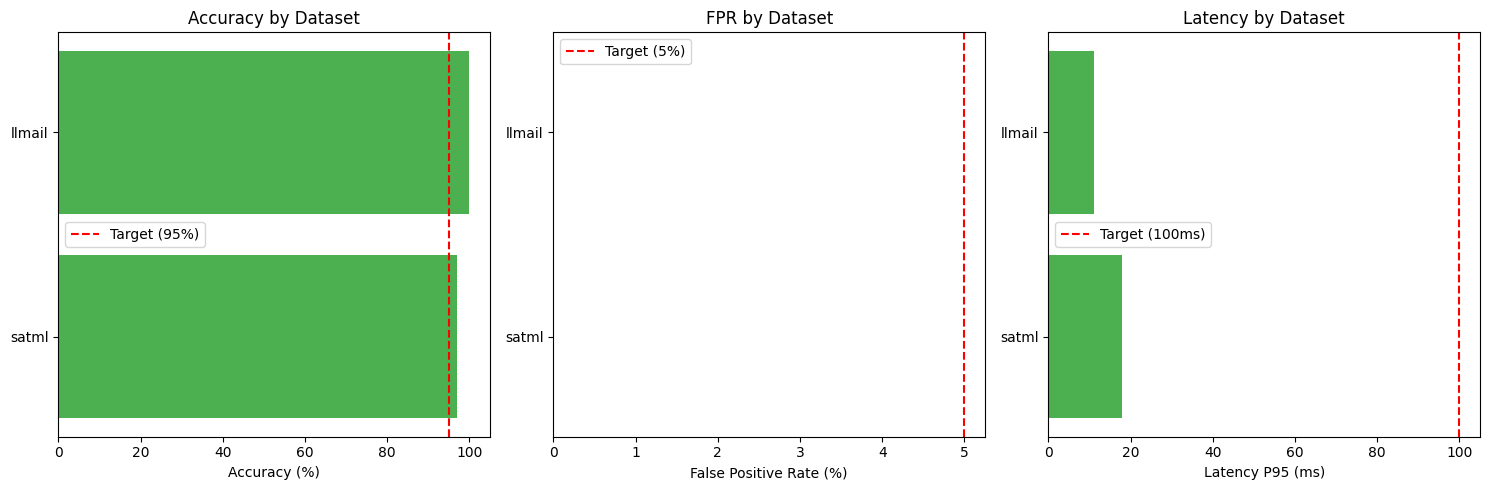

In [16]:
import matplotlib.pyplot as plt

# Accuracy comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets_names = list(results.results.keys())
colors = ['#4CAF50' if m.accuracy >= 0.95 else '#FFC107' if m.accuracy >= 0.80 else '#F44336' 
          for m in results.results.values()]

# Accuracy
accuracies = [m.accuracy * 100 for m in results.results.values()]
axes[0].barh(datasets_names, accuracies, color=colors)
axes[0].axvline(x=95, color='red', linestyle='--', label='Target (95%)')
axes[0].set_xlabel('Accuracy (%)')
axes[0].set_title('Accuracy by Dataset')
axes[0].set_xlim(0, 105)
axes[0].legend()

# FPR
fprs = [m.false_positive_rate * 100 for m in results.results.values()]
fpr_colors = ['#4CAF50' if m.false_positive_rate <= 0.05 else '#F44336' 
              for m in results.results.values()]
axes[1].barh(datasets_names, fprs, color=fpr_colors)
axes[1].axvline(x=5, color='red', linestyle='--', label='Target (5%)')
axes[1].set_xlabel('False Positive Rate (%)')
axes[1].set_title('FPR by Dataset')
axes[1].legend()

# Latency
latencies = [m.latency_p95 for m in results.results.values()]
lat_colors = ['#4CAF50' if m.latency_p95 <= 100 else '#F44336' 
              for m in results.results.values()]
axes[2].barh(datasets_names, latencies, color=lat_colors)
axes[2].axvline(x=100, color='red', linestyle='--', label='Target (100ms)')
axes[2].set_xlabel('Latency P95 (ms)')
axes[2].set_title('Latency by Dataset')
axes[2].legend()

plt.tight_layout()
plt.show()

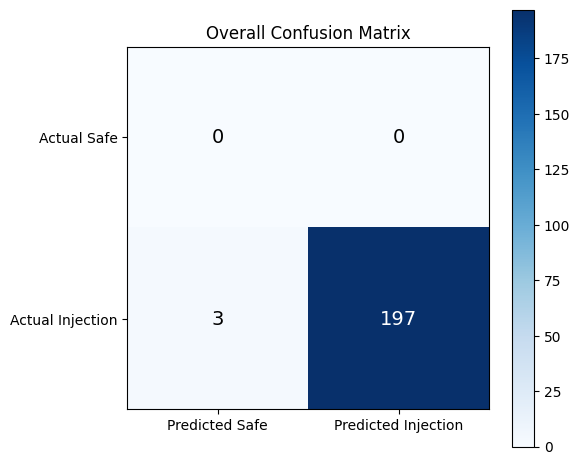


Total Samples: 200
Correct: 197 (98.5%)
Errors: 3 (1.5%)


In [17]:
# Overall confusion matrix
import numpy as np

total_tp = sum(m.true_positives for m in results.results.values())
total_tn = sum(m.true_negatives for m in results.results.values())
total_fp = sum(m.false_positives for m in results.results.values())
total_fn = sum(m.false_negatives for m in results.results.values())

cm = np.array([[total_tn, total_fp], [total_fn, total_tp]])

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap='Blues')

# Labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted Safe', 'Predicted Injection'])
ax.set_yticklabels(['Actual Safe', 'Actual Injection'])

# Text annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                       color="white" if cm[i,j] > cm.max()/2 else "black", fontsize=14)

ax.set_title('Overall Confusion Matrix')
plt.colorbar(im)
plt.tight_layout()
plt.show()

print(f"\nTotal Samples: {cm.sum():,}")
print(f"Correct: {total_tp + total_tn:,} ({(total_tp + total_tn) / cm.sum():.1%})")
print(f"Errors: {total_fp + total_fn:,} ({(total_fp + total_fn) / cm.sum():.1%})")

## 💾 Export Results

In [18]:
# Export to JSON
results.save("benchmark_results.json")
print("✅ Results saved to benchmark_results.json")

2025-12-04T19:54:35.201970Z Results saved                  path=benchmark_results.json
✅ Results saved to benchmark_results.json


In [19]:
# Export to Markdown
reporter.save("benchmark_report.md", format="markdown")
print("✅ Report saved to benchmark_report.md")

NameError: name 'reporter' is not defined

## 🔄 Compare Multiple Models

Run this section to compare different models side-by-side.

In [21]:
# Compare multiple models
MODELS_TO_COMPARE = [
    "models/comprehensive_classifier.json",
    "models/all-MiniLM-L6-v2_classifier.json",
    "models/mof_classifier.json",  # Uncomment after training MOF model
]

comparison_results = {}

for model_path in MODELS_TO_COMPARE:
    if not os.path.exists(model_path):
        print(f"⚠️ Skipping {model_path} (not found)")
        continue
        
    print(f"\n📊 Benchmarking: {model_path}")
    
    # Load model
    det = EmbeddingClassifier()
    det.load_model(model_path)
    
    # Run benchmark (quick)
    run = BenchmarkRunner(det, threshold=0.5)
    res = run.run_all(
        limit_per_dataset=200,  # Quick comparison
        include_datasets=["satml", "deepset"],  # Quick subset
        verbose=False
    )
    
    comparison_results[model_path] = res
    print(f"   Accuracy: {res.overall_accuracy:.1%} | FPR: {res.overall_fpr:.1%}")


📊 Benchmarking: models/comprehensive_classifier.json
2025-12-04T19:55:28.651587Z Loading embedding model        model=all-MiniLM-L6-v2
2025-12-04T19:55:29.401625Z Model loaded                   is_trained=True path=models/all-MiniLM-L6-v2_classifier.json
2025-12-04T19:55:29.402033Z Pre-trained model loaded       path=PosixPath('models/all-MiniLM-L6-v2_classifier.json')
2025-12-04T19:55:29.414601Z Model loaded                   is_trained=True path=models/comprehensive_classifier.json
2025-12-04T19:55:29.414950Z BenchmarkRunner initialized    detector_type=embedding_classifier threshold=0.5
2025-12-04T19:55:29.415494Z Loading dataset: satml        
2025-12-04T19:55:29.415799Z Loading SaTML CTF 2024 dataset limit=200
2025-12-04T19:55:33.826168Z SaTML dataset loaded           samples=200
2025-12-04T19:55:33.826761Z Loading dataset: deepset      
2025-12-04T19:55:33.827043Z Loading deepset/prompt-injections dataset include_injections=True include_safe=True limit=200
2025-12-04T19:55:34.21

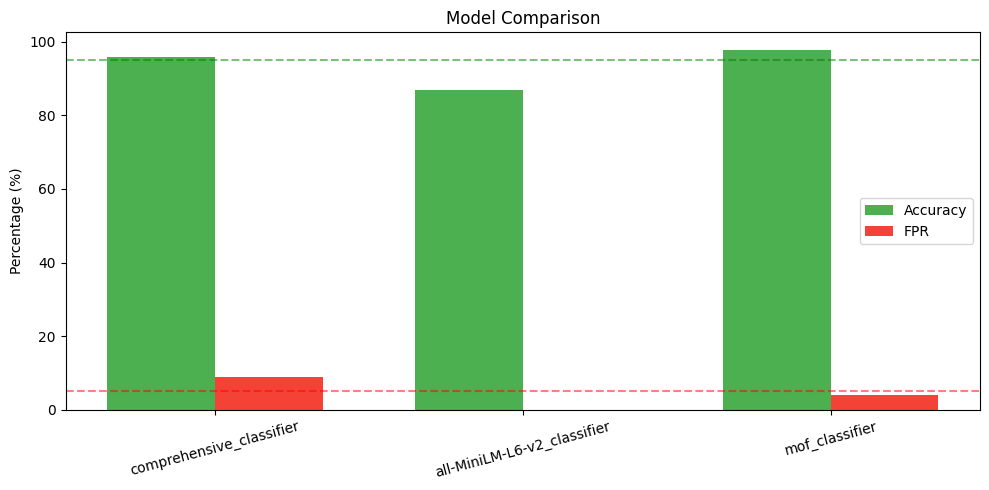

In [23]:
# Comparison chart
if comparison_results:
    model_names = [os.path.basename(p).replace('.json', '') for p in comparison_results.keys()]
    accuracies = [r.overall_accuracy * 100 for r in comparison_results.values()]
    fprs = [r.overall_fpr * 100 for r in comparison_results.values()]
    
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(model_names))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='#4CAF50')
    bars2 = ax.bar(x + width/2, fprs, width, label='FPR', color='#F44336')
    
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=15)
    ax.legend()
    ax.axhline(y=95, color='green', linestyle='--', alpha=0.5, label='Accuracy Target')
    ax.axhline(y=5, color='red', linestyle='--', alpha=0.5, label='FPR Target')
    
    plt.tight_layout()
    plt.show()